# Homework 2 File

In [289]:
import random
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time

## Question 1 - Least Squares and Logistic Regression

### Part A

In [78]:
xvalsx = []
for x in range(50):
    xvalsx += [random.uniform(-4, 4)]
    
yvalsx = [0] * len(xvals)
for i in range(len(xvals)):
    yvalsx[i] += xvalsx[i] + random.uniform(0, 3)

print(len(xvalsx), len(yvalsx))

50 50


In [79]:
xvalso = []
for x in range(50):
    xvalso += [random.uniform(-4, 4)]

yvalso = [0] * len(xvalso)
for i in range(len(xvalso)):
    yvalso[i] += xvalso[i] - random.uniform(0, 3)
    
print(len(xvalso), len(yvalso))

50 50


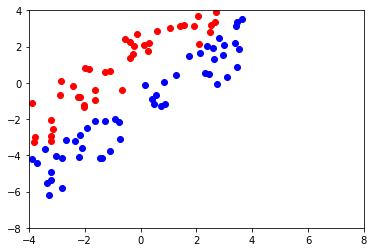

In [80]:
plt.scatter(xvalsx,yvalsx,color='red')
plt.scatter(xvalso,yvalso,color='blue')
plt.xlim([-4, 8])
plt.ylim([-8, 4])
plt.show()

In [81]:
xvalsoutlier = []
for x in range(10):
    xvalsoutlier += [random.uniform(6, 8)]
    
yvalsoutlier = [0] * len(xvalsoutlier)
for i in range(len(xvalsoutlier)):
    yvalsoutlier[i] += xvalsx[i] - random.uniform(9, 12)

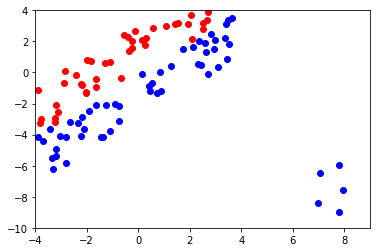

In [85]:
plt.scatter(xvalsx, yvalsx, color='red')
plt.scatter(xvalso  + xvalsoutlier, yvalso + yvalsoutlier, color='blue')
plt.xlim([-4, 9])
plt.ylim([-10, 4])
plt.show()

In [104]:
x1with_outlier = np.array(xvalsx + xvalso + xvalsoutlier)
x2with_outlier = np.array(yvalsx + yvalso + yvalsoutlier)
xvals_outlier = np.array([x1with_outlier] + [x2with_outlier]).T

yvals_outlier = ([0] * len(xvalsx)) + ([1] * len(xvalso + xvalsoutlier))

x1without_outlier = np.array(xvalsx + xvalso)
x2without_outlier = np.array(yvalsx + yvalso)
xvals_nooutlier = np.array([x1without_outlier] + [x2without_outlier]).T

yvals_nooutlier = ([0] * len(xvalsx)) + ([1] * len(xvalso))

print(xvals_outlier.shape)
print(xvals_nooutlier.shape)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
(110, 2)
(100, 2)


### Part B

In [132]:
logistic_model_with_outlier = linear_model.LogisticRegression().fit(xvals_outlier, yvals_outlier)
logistic_model_without_outlier = linear_model.LogisticRegression().fit(xvals_nooutlier, yvals_nooutlier)

linear_model_with_outlier = linear_model.LinearRegression().fit(xvals_outlier, yvals_outlier)
linear_model_without_outlier = linear_model.LinearRegression().fit(xvals_nooutlier, yvals_nooutlier)

### Part C

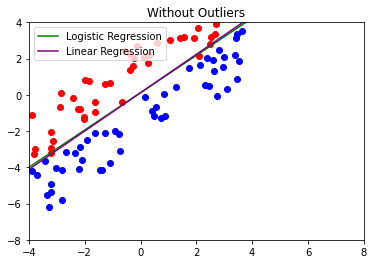

In [177]:
plt.scatter(xvalsx,yvalsx,color='red')
plt.scatter(xvalso,yvalso,color='blue')

b = logistic_model_without_outlier.intercept_
w1, w2 = logistic_model_without_outlier.coef_.T
b = -b/w2
m = -w1/w2

x = np.linspace(-4, 8, 1000)
plt.plot(x, m * x + c, color='green', label='Logistic Regression')

b = linear_model_without_outlier.intercept_
w1, w2 = linear_model_without_outlier.coef_.T
b = -b/w2
m = -w1/w2

plt.plot(x, m * x + c, color='purple', label='Linear Regression')

plt.legend(loc="upper left")
plt.xlim([-4, 8])
plt.ylim([-8, 4])
plt.title("Without Outliers")
plt.show()

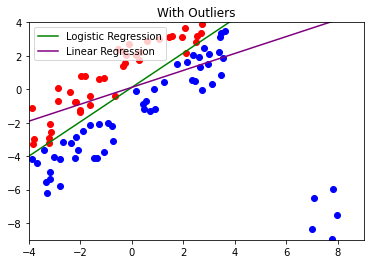

In [178]:
plt.scatter(xvalsx, yvalsx, color='red')
plt.scatter(xvalso  + xvalsoutlier, yvalso + yvalsoutlier, color='blue')

b = logistic_model_with_outlier.intercept_[0]
w1, w2 = logistic_model_with_outlier.coef_.T
b = -b/w2
m = -w1/w2

x = np.linspace(-4, 8, 1000)
plt.plot(x, m * x + c, color='green', label='Logistic Regression')

b = linear_model_with_outlier.intercept_
w1, w2 = linear_model_with_outlier.coef_.T
b = -b/w2
m = -w1/w2

plt.plot(x, m * x + c, color='purple', label='Linear Regression')

plt.legend(loc="upper left")
plt.xlim([-4, 9])
plt.ylim([-9, 4])
plt.title("With Outliers")
plt.show()

Why Logistic Regression is not sensitive to outliers: 
Logistic regression finds the estimate that minimizes its cost function, which is inverse logistic loss function, which does not place strong value (penalty) to outliers.

## Question 2 - Logistic Regression and kNN Classification

In [347]:
X = np.load("mnist_data.npy")
y = np.load("mnist_labels.npy")
print(X.shape, y.shape)

(21000, 784) (21000,)


### Part A

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Part B

In [349]:
logistic_model_mnist = linear_model.LogisticRegression(max_iter = 50).fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [166]:
print('Train Accuracy:', logistic_model_mnist.score(X_train, y_train))

print('Test Accuracy:', logistic_model_mnist.score(X_test, y_test))

Train Accuracy: 0.9429761904761905
Test Accuracy: 0.9130952380952381


### Part C

In [175]:
trainaccuracy = []
testaccuracy = []

for i in range(1, 27, 2):
    Knearest_model_mnist = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    trainaccuracy += [Knearest_model_mnist.score(X_train, y_train)]
    testaccuracy += [Knearest_model_mnist.score(X_test, y_test)]

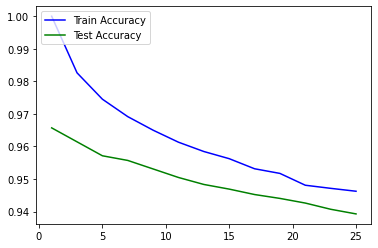

In [176]:
plt.plot(range(1, 27, 2), trainaccuracy, color = 'blue', label = 'Train Accuracy')
plt.plot(range(1, 27, 2), testaccuracy, color = 'green', label = 'Test Accuracy')
plt.legend(loc="upper left")
plt.show()

Explained Results: It seems as though the less neighbors we use, the better the train and test accuracy becomes. This means that when each sample only considers its closest neighbor to classify itself, it does so best when only considering the other sample that is most similar to it

In [350]:
trainaccuracy = []
testaccuracy = []

for n in range(3000, len(y), 3000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n, random_state=42)
    Knearest_model_mnist = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
    trainaccuracy += [Knearest_model_mnist.score(X_train, y_train)]
    testaccuracy += [Knearest_model_mnist.score(X_test, y_test)]

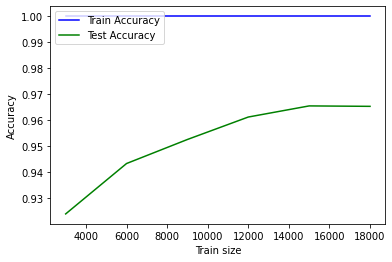

In [351]:
plt.plot(range(3000, len(y), 3000), trainaccuracy, color = 'blue', label = 'Train Accuracy')
plt.plot(range(3000, len(y), 3000), testaccuracy, color = 'green', label = 'Test Accuracy')
plt.legend(loc="upper left")
plt.xlabel("Train size")
plt.ylabel("Accuracy")
plt.show()

Give a few bullet points explaining the pros and cons of these algorithms and when and why we use logistic regression over linear regression:

Logistic Regression:
Pros:
Easy to implement
Easy to train
It is very fast at classifying unknown records.	

Cons:
If not enough data can very easily lead to overfitting
Assumes linear boundary between classes


Linear Regression:
Pros:
Easy to impliment
Easy to interpret
Far less complex than other algorithms

Cons:
Outliers can have huge effects on the boundaries
Assumes linear boundary between classes


Why we use logistic regression instead:
The main benefit of using a logistic regression instead of linear regression is its durability to outliers, it helps strongly when classifying data that may contain such samples. 


## Question 3 - PCA - Dimensionality Reduction

### Part A

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

X_scaled = StandardScaler().fit_transform(X_train, y_train)

pca = PCA().fit(X_scaled, y)

### Part B

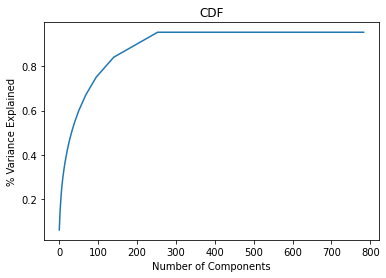

In [353]:
variance = pca.explained_variance_ratio_
var=np.cumsum(np.round(variance, decimals=3))
plt.plot(var)
plt.title("CDF")
plt.xlabel("Number of Components")
plt.ylabel("% Variance Explained")
plt.show()

### Part C

I am going to use 250 components, as it explains approximately 100% of the data and is still relatively small

In [354]:
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=250))

knn = KNeighborsClassifier(n_neighbors=1)

pca.fit(X_train, y_train)
knn.fit(pca.transform(X_train), y_train)

print("train accuracy:", knn.score(pca.transform(X_train), y_train))
print("test accuracy:", knn.score(pca.transform(X_test), y_test))

train accuracy: 1.0
test accuracy: 0.9302857142857143


### Part D

In [355]:
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=250))
knn = KNeighborsClassifier(n_neighbors=1)

runningtime_trainsize = []

for n in range(3000, 21001, 3000):
    if n == 21000:
        X_train = X
        y_train = y
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n, random_state=42)
    
    start_time = time.time()
    pca.fit(X_train, y_train)
    knn.fit(pca.transform(X_train), y_train)
    end_time = time.time()
    
    timelength = end_time - start_time
    runningtime_trainsize.append(timelength)

In [356]:
runningtime_principalcomponents = []
X_train = X
y_train = y


for n in range(50, 751, 100):
    pca = make_pipeline(StandardScaler(),
                    PCA(n_components=n))
    knn = KNeighborsClassifier(n_neighbors=1)
    
    start_time = time.time()
    pca.fit(X_train, y_train)
    knn.fit(pca.transform(X_train), y_train)
    end_time = time.time()
    
    timelength = end_time - start_time
    runningtime_principalcomponents.append(timelength)

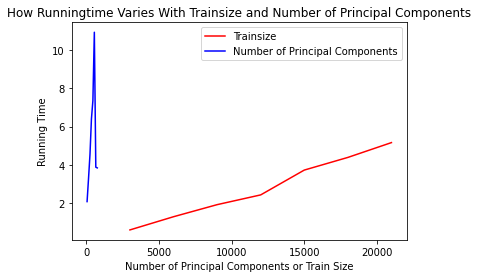

In [357]:
plt.plot(range(3000, 21001, 3000), runningtime_trainsize, color = 'red', label = 'Trainsize')
plt.plot(range(50, 751, 100), runningtime_principalcomponents, color = 'blue', label = 'Number of Principal Components')
plt.title("How Runningtime Varies With Trainsize and Number of Principal Components")
plt.xlabel("Number of Principal Components or Train Size")
plt.ylabel("Running Time")
# plt.xlim([0, 1000)
plt.legend()
plt.show()

The Number of Principal Components (dimensions of the data) seems to affect the runningtime more than the trainsize (Number of samples used). Also, the number of principal components not having a directly linear correlation with runtime is interesting.

### Part E

Parameters

Fast Model: k = 1, train_size = 12000, n_components=650
Accurate Model: k = 1, train_size = 18000, n_components=784

In [358]:
starttime = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=12000, random_state=42)

pca = make_pipeline(StandardScaler(),
                    PCA(n_components=650))

knn = KNeighborsClassifier(n_neighbors=1)

pca.fit(X_train, y_train)
knn.fit(pca.transform(X_train), y_train)
endtime = time.time()

time_ = endtime - starttime

print("Fast Model train accuracy:", knn.score(pca.transform(X_train), y_train))
print("Fast Model test accuracy:", knn.score(pca.transform(X_test), y_test))
print("Fast Model time:", time_)
print()


starttime = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=18000, random_state=42)

pca = make_pipeline(StandardScaler(),
                    PCA())

knn = KNeighborsClassifier(n_neighbors=1)

pca.fit(X_train, y_train)
knn.fit(pca.transform(X_train), y_train)

endtime = time.time()
time_ = endtime - starttime

print("Most Accurate Model train accuracy:", knn.score(pca.transform(X_train), y_train))
print("Most Accurate Model test accuracy:", knn.score(pca.transform(X_test), y_test))
print("Most Accurate Model time:", time_)

Fast Model train accuracy: 1.0
Fast Model test accuracy: 0.9292222222222222
Fast Model time: 2.4371697902679443

Most Accurate Model train accuracy: 1.0
Most Accurate Model test accuracy: 0.9433333333333334
Most Accurate Model time: 3.7350361347198486


In [359]:
print('Fast Model has ' + str(1.0/1.0) + 'x train accuracy')
print('Fast Model has ' + str(0.9292222222222222/0.9433333333333334) + 'x test accuracy')
print('Fast Model has ' + str(2.4371697902679443/3.7350361347198486) + 'x time')

Fast Model has 1.0x train accuracy
Fast Model has 0.9850412249705535x test accuracy
Fast Model has 0.6525157193561523x time


### Part F

(10, 784)


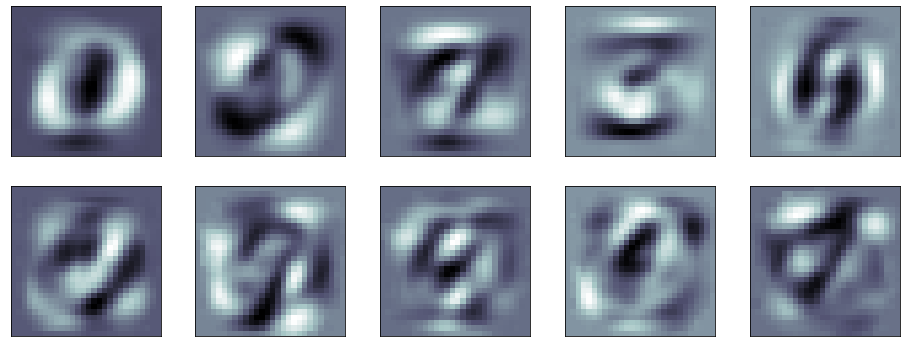

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=18000, random_state=42)

scaled = StandardScaler().fit_transform(X_train, y_train)
pca = PCA(n_components=10)
pca.fit(scaled, y_train)
components = pca.components_

fig = plt.figure(figsize=(16,16))

for i in range(10):
    component = components[i]
    reshaped = np.reshape(component, (28,28))
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(reshaped, cmap=plt.cm.bone)